In [1]:
import pandas as pd
import numpy as np 
import math
import seaborn as sn 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Overview data

In [2]:
data=pd.read_csv("preprocessed_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   ranked         1000 non-null   int64  
 2   score          1000 non-null   float64
 3   popularity     1000 non-null   int64  
 4   favorite       1000 non-null   int64  
 5   published      1000 non-null   int64  
 6   description    1000 non-null   object 
 7   serialization  1000 non-null   int64  
 8   reading        1000 non-null   int64  
 9   completed      1000 non-null   int64  
 10  dropped        1000 non-null   int64  
 11  plan_to_read   1000 non-null   int64  
 12  genre          1000 non-null   float64
dtypes: float64(2), int64(9), object(2)
memory usage: 101.7+ KB


In [3]:
data.head()

,name,ranked,score,popularity,favorite,published,description,serialization,reading,completed,dropped,plan_to_read,genre
0,Berserk,1,9.47,1,122974,1989,gut former mercenari known black swordsman rev...,221,364280,87307,10263,154118,3.0
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,2,9.30,26,42935,2004,american old west world greatest race begin th...,210,34922,162358,2141,50652,8.0
2,Vagabond,3,9.24,15,40221,1998,16th centuri japan shinmen takez wild rough yo...,161,108564,81383,5054,145679,3.0
3,One Piece,4,9.22,3,114647,1997,gol roger man refer king pirat set execut worl...,189,465243,30242,18817,46908,10.0
4,Monster,5,9.15,29,20528,1994,kenzou tenma renown japanes neurosurgeon work ...,19,33413,94357,2754,97297,3.0


In [4]:
data.describe()

,ranked,score,popularity,favorite,published,serialization,reading,completed,dropped,plan_to_read,genre
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,8.105460,1981.497000,2597.611000,2007.506000,124.73800,12714.611000,13397.157000,1259.394000,12780.535000,10.100000
std,288.819436,0.277735,2623.499291,8102.776063,10.142427,73.72202,33715.575374,29434.470247,2485.783041,16843.215984,4.550902
min,1.000000,7.780000,1.000000,1.000000,1966.000000,0.00000,18.000000,24.000000,5.000000,126.000000,2.000000
25%,250.750000,7.890000,373.750000,150.750000,2003.000000,61.75000,1170.500000,1028.000000,143.750000,3015.250000,7.000000
50%,500.500000,8.040000,1040.500000,439.000000,2009.000000,130.50000,3266.000000,3805.000000,434.500000,6738.000000,11.000000
75%,750.250000,8.260000,2610.750000,1697.000000,2015.000000,189.00000,9729.750000,11020.750000,1237.750000,15015.500000,14.000000
max,1000.000000,9.470000,26745.000000,122974.000000,2023.000000,243.00000,465243.000000,302871.000000,26342.000000,154118.000000,18.000000


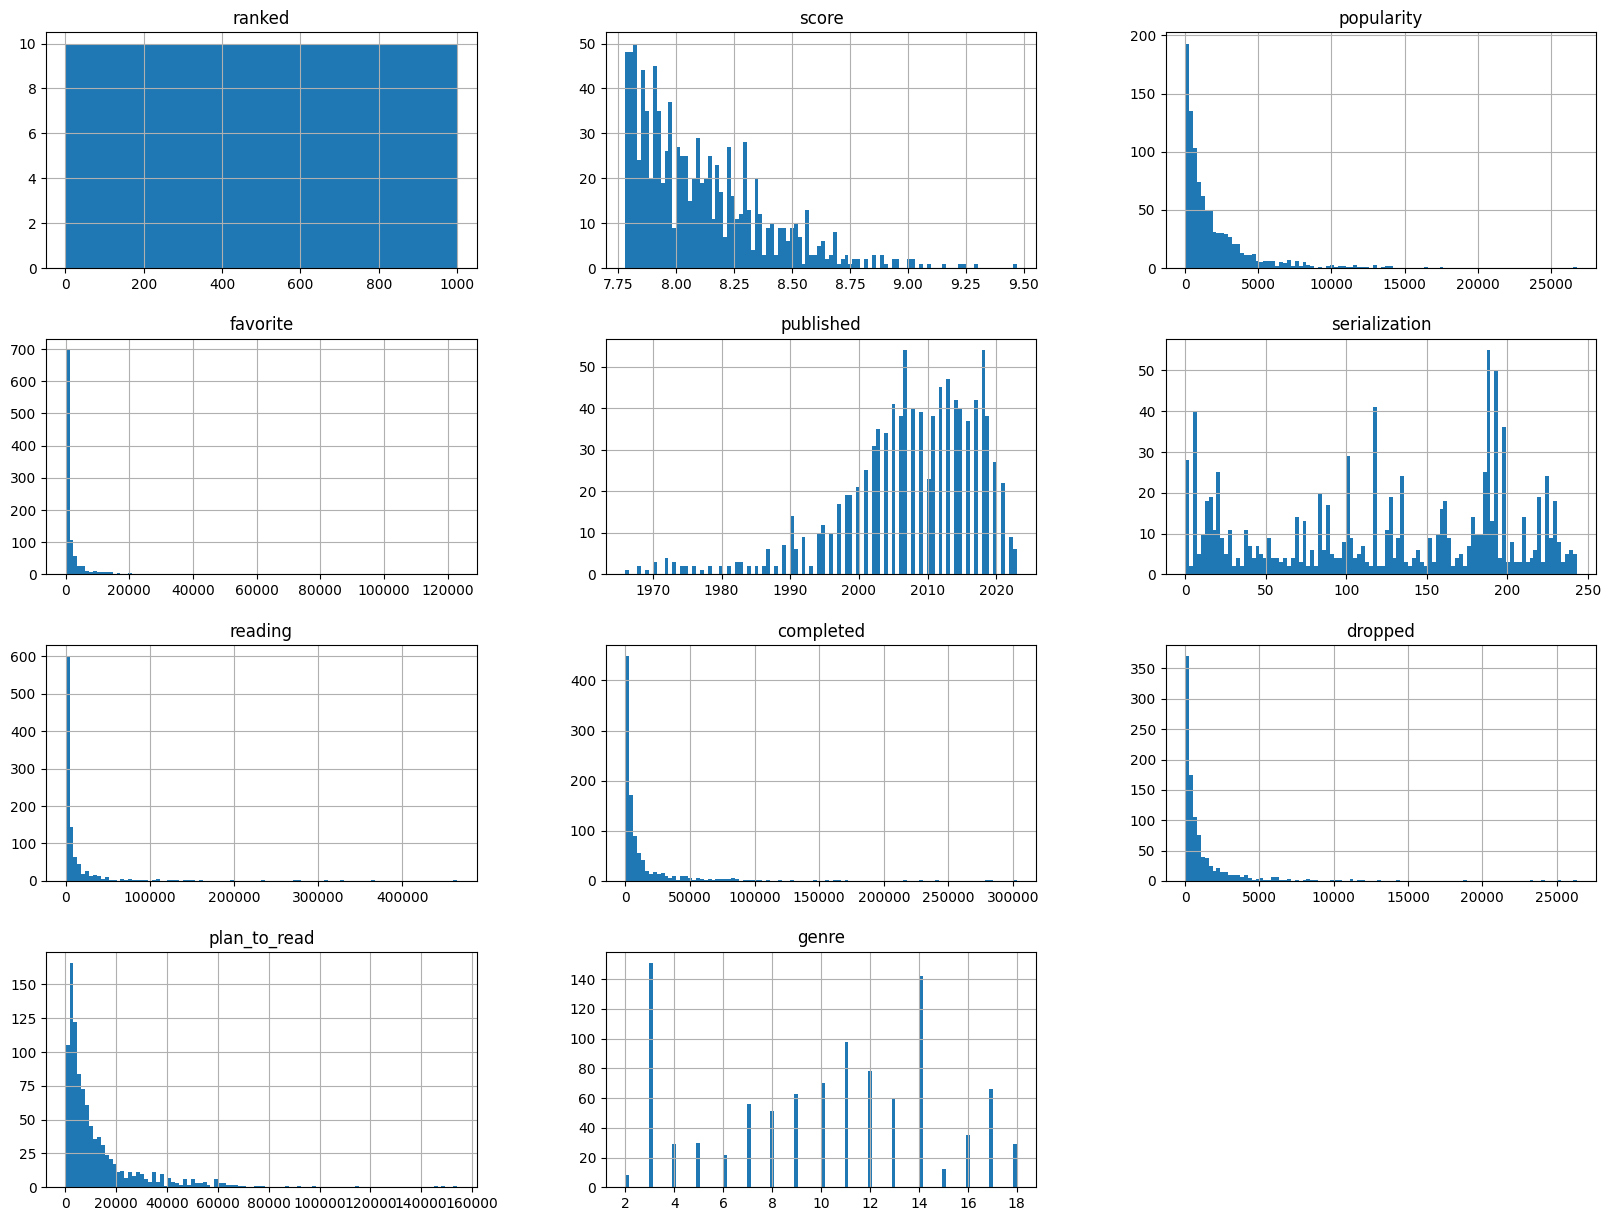

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=100,figsize=(20,15))
plt.show()

### Câu hỏi 1: Mối liên hệ thể loại và tỉ lệ dropped/completed?

**Ý Nghĩa: Xác định thể loại dễ khiến người dùng drop nhất**

**Cách làm: Xác định tỉ lệ drop trung bình trên mỗi thể loại rồi dùng bar chart thể hiện**

<BarContainer object of 17 artists>

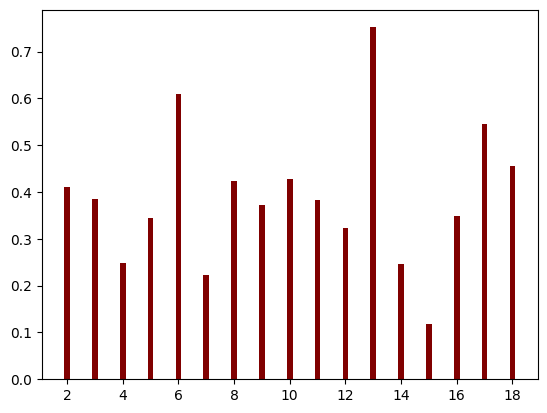

In [6]:
df1=data.copy()
df1=df1[['genre','dropped','completed']]
df1['ratio_drop']=df1['dropped']/df1['completed']
df1=df1.groupby('genre').mean().reset_index()
plt.bar(df1['genre'], df1['ratio_drop'], color ='maroon', 
        width = 0.2)

**Ta có thể thấy thể loại 13 có tỉ lệ drop trung bình cao nhất**

### Câu hỏi 2: Liệu có thể dự đoán score dựa vào favorite, reading, completed, dropped, plan_to_read columns?

**Ý nghĩa: Có thể tính được rank của manga một cách ngầm định( bởi các thông tin favorite, reading, completed, dropped, plan_to_read dễ có và có số lượng lớn hơn)để có thể phát hiện được dấu hiệu bất thường của bộ manga có được gian lận để được thứ hạng cao không**

**Cách làm: Thử xây dựng một mô hình tuyến tính dùng thư viên scikit learn**

In [7]:
df2=data.copy()
df2=df2[['score','favorite','reading','completed','dropped','plan_to_read']] #lấy cột cần quan tâm
corr_matrix=df2.corr()
corr_matrix['score'] # hệ số tương quan của score với các thuộc tính quan tâm


score           1.000000
favorite        0.483527
reading         0.388924
completed       0.337177
dropped         0.263457
plan_to_read    0.635203
Name: score, dtype: float64

<Axes: >

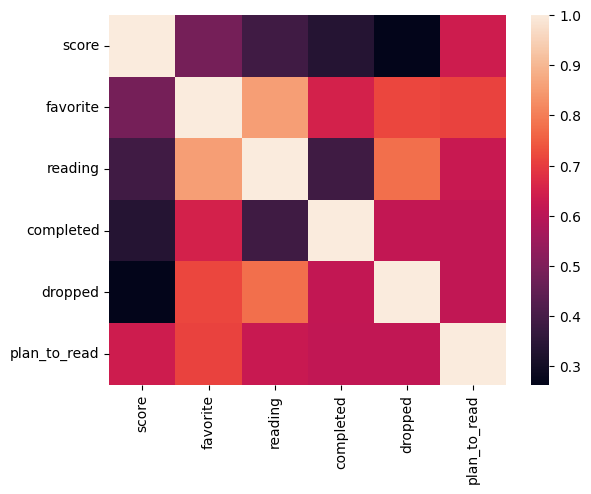

In [8]:
sn.heatmap(data = corr_matrix)

In [9]:
X = df2[['favorite', 'reading', 'completed', 'dropped', 'plan_to_read']]
y = df2['score']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model with the training data
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))


Coefficients: 
 [ 8.15322622e-06  1.38296727e-07 -6.00046518e-07 -3.41220345e-05
  1.09019258e-05]
Mean squared error: 0.04


**Có thể thấy ta sẽ có một mô hình dự đoán tương đối tốt để dự đoán score từ 5 thuộc tính trên**

### Câu hỏi 3: Mối liên hệ giữa thể loại và phổ biến?

**Ý nghĩa: Chọn được thể loại có tiềm năng to lớn để bộ truyện thành công**

**Cách làm: Dùng scatter plots với marginal histograms**




In [10]:
df3=data.copy()

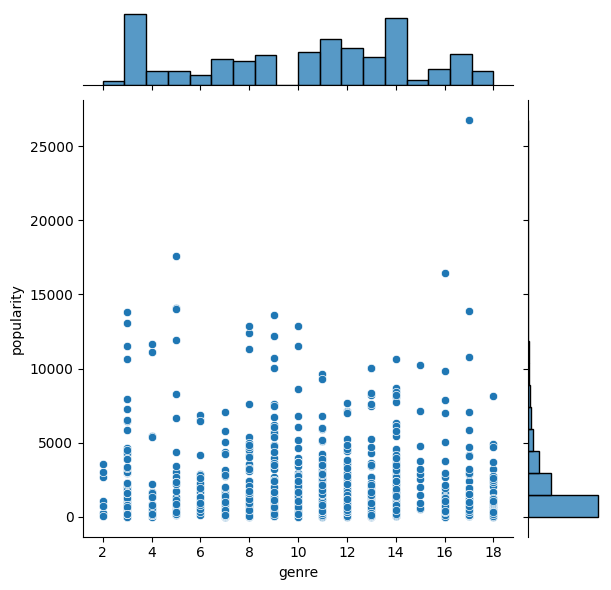

In [11]:
# Create a scatter plot with marginal histograms
sn.jointplot(data=df3, x="genre", y="popularity",marginal_kws=dict(bins=18))

# Display the plot
plt.show()

**Biểu đồ cho thấy thể loại 3 và thể loại 14 đa số có mức xếp hạng phổ biến cao còn thể loại 2, 15 có mức xếp hạng phổ biến thấp**

### Câu hỏi 4: Liệu có thể xác định truyện nào có tiềm năng thăng hạng và bộ nào có tiềm năng rớt hạng?

**Ý nghĩa: Xác định được tiềm năng thành công của bộ truyện**

**Cách làm: Trên cùng score, xác định dựa vào reading để xác định tiềm năng?**

In [25]:
df4=data.copy()
df4.columns
df4=df4[['name','score','reading']]
df4_1=df4.groupby('score').max().reset_index() #trên cùng score bộ đang có nhiều người đang đọc nhất

df4_2=df4.groupby('score').min().reset_index() #trên cùng score bộ đang có ít người đang đọc nhất

df4_ins= df4_1[df4_1['name']!=df4_2['name']]
print(df4_ins) #bộ có tiềm năng thăng hạng
df4_dec= df4_2[df4_2['name']!=df4_1['name']]
print(df4_dec) #bộ có tiềm năng rớt hạng

     score                                               name  reading
0     7.78                                           Whistle!    30627
1     7.79                                      Yumekui Merry    71447
2     7.80                          Yankee-kun to Megane-chan    18566
3     7.81                                Yume-iro Pâtissière    39430
4     7.82                 Watashi no Oshi wa Akuyaku Reijou.    27822
..     ...                                                ...      ...
100   8.82                           Kaze no Tani no Nausicaä    72968
101   8.85  Umineko no Naku Koro ni Chiru - Episode 8: Twi...    68041
103   8.88                                                GTO    27068
106   8.94                                               Real    23424
111   9.03                                         Grand Blue    90150

[97 rows x 3 columns]
     score                       name  reading
0     7.78                   Air Gear      189
1     7.79             7 Seeds 

### Câu hỏi 5: Mối liên hệ giữa serialization thể loại?

**Ý nghĩa: Biết được nhà xuất bản thường xuất bản thể loại nào**

**Cách làm:**

In [27]:
df5=data.copy()
df5.columns
df5=df5[['serialization','genre']]
df5

,serialization,genre
0,221,3.0
1,210,8.0
2,161,3.0
3,189,10.0
4,19,3.0
...,...,...
995,159,15.0
996,177,12.0
997,124,12.0
998,193,3.0


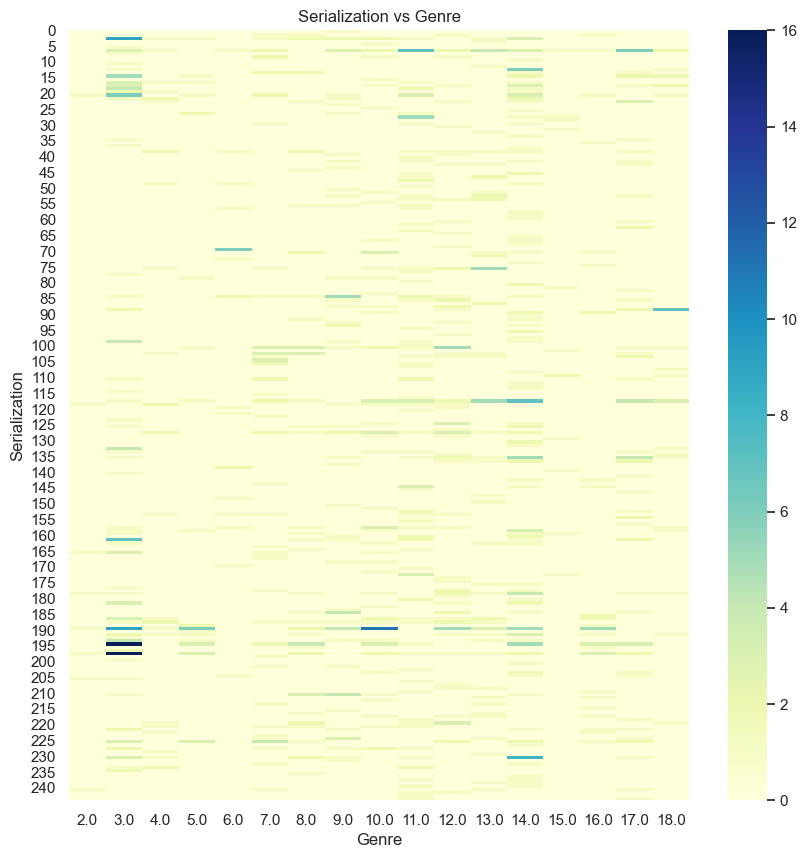

In [29]:
pivot_table = df5.pivot_table(index='serialization', columns='genre', aggfunc='size', fill_value=0)

# tạo heatmap
plt.figure(figsize=(10, 10))
sn.heatmap(pivot_table, cmap='YlGnBu')

# tạo tên và nhãn cho plot
plt.title('Serialization vs Genre')
plt.xlabel('Genre')
plt.ylabel('Serialization')
plt.show()

**Ta có thể thấy đa phần nhà xuất bản không chuyên về một genre cụ thể nào ngoài trừ 1 vài nxb như 195 và 197**